# Netflix Stock Visualization

## Introduction
This project will visually investigate trends of Netflix (NYSE: NFLX) stock data from the year 2017.

It will contain the following plots:
- Stock Price distribution in 2017
- NFLX revenue and earnings by quarter
- Actual vs. estimated earnings per share by quarter
- NFLX vs. Dow Jones Industrial Average price in 2017

### Imports

We will be using pandas, matplotlib, and seaborn to graph the data.

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Data Analysis
First we will read in our datasets and inspect them.

In [4]:
netflix_stocks = pd.read_csv('NFLX.csv')
print(netflix_stocks.head())

dowjones_stocks = pd.read_csv('DJI.csv')
print(dowjones_stocks.head())

netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  
         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

      Ad

`Adj Close` is the stock closing price following adjustments for both dividends and splits.
To make this easier to work with, we will be changing the `Adj Close` column to `Price`
and checking for success.

In [5]:
netflix_stocks.rename({'Adj Close':'Price'}, axis=1, inplace=True)
dowjones_stocks.rename({'Adj Close':'Price'}, axis=1, inplace=True)
netflix_stocks_quarterly.rename({'Adj Close':'Price'}, axis=1, inplace=True)

print(netflix_stocks.head())
print(dowjones_stocks.head())
print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  
         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

        

## Graphing the Data

First we will be using a violin plot to look at the shape of each price per quarter.
This lets us understand the deviations in each quarter more aptly.

Text(0, 0.5, 'Closing Stock Price')

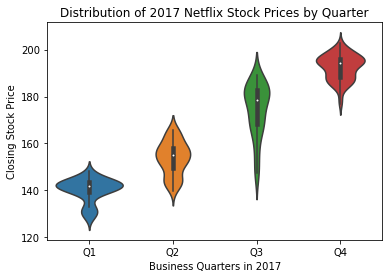

In [6]:
ax = sns.violinplot()
sns.violinplot(data = netflix_stocks_quarterly, x = 'Quarter', y = 'Price')
# setting labels
ax.set_title('Distribution of 2017 Netflix Stock Prices by Quarter')
ax.set_xlabel('Business Quarters in 2017')
ax.set_ylabel('Closing Stock Price')

Now let's compare estimated and actual earnings in each quarter.
Apart from Q3, NFLX outperformed or matched estimates throughout 2017.

Text(0.5, 1.0, 'Earning Per Share in Cents')

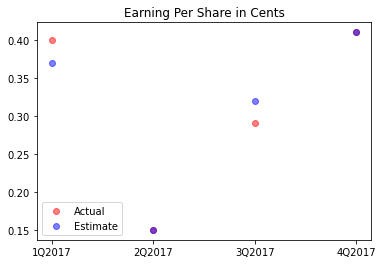

In [12]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41]

# plotting the data
plt.scatter(x = x_positions,
            y = earnings_actual,
            color = 'red',
            alpha = 0.5)
plt.scatter(x = x_positions,
            y = earnings_estimate,
            color = 'blue',
            alpha = 0.5)
plt.legend(['Actual', 'Estimate'])
plt.xticks(x_positions, chart_labels)
plt.title('Earning Per Share in Cents')

Earnings and revenue will be demonstrated in a stacked bar plot.
This is a useful way to look at the data because we can just
how large a portion of Netflix's revenue is not translated into earnings.

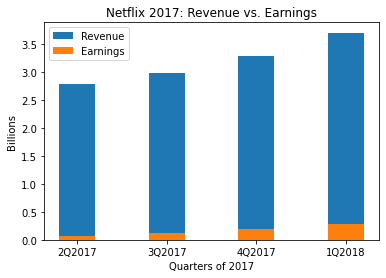

In [16]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element in range(d)]
plt.bar(bars1_x, revenue_by_quarter)

# Earnings
n = 1  # This is our second dataset
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element in range(d)]
plt.bar(bars2_x, earnings_by_quarter)

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
plt.xticks(middle_x, quarter_labels)

plt.xlabel('Quarters of 2017')
plt.ylabel('Billions')
plt.legend(["Revenue", "Earnings"])
plt.title('Netflix 2017: Revenue vs. Earnings')

Finally, we will compare the performance of NFLX to the rest of the market.
By placing them side-by-side and adjusting for scale we can see that,
overall, NFLX roughly follows market performance for the year.

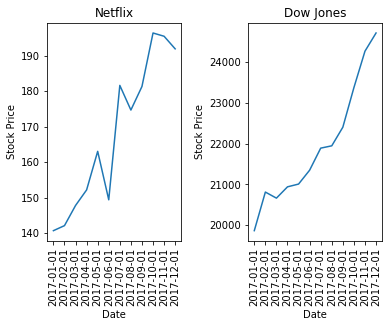

In [17]:
# Left plot Netflix
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_title('Netflix')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title('Dow Jones')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock Price')
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

plt.subplots_adjust(wspace=0.5)

## Conclusion
In the past few plots we have gained unique insights into NFLX
performance in 2017. We looked at quarterly performance, estimated vs.
actual earnings, earnings vs. revenue, and overall performance with market performance.

Further investigation could look at performance of NFLX in other years,
compare performance to other companies in the sector,
and other performance metrics (e.g. P/E ratio, D/E, and/or PEG).

#### Data Sources
NFLX stock data was provided by [Yahoo Finance](https://finance.yahoo.com/quote/DATA/).